Plot SatSan Results

In [ ]:
import sys
import os
import geopandas as gpd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
%matplotlib inline
gd = gpd.read_file("../PySal/municipios/BRMUE250GC_SIR.shp")
gdf = gpd.read_file('output/Suicide-SAT.col.shp')
fig, ax = plt.subplots (figsize = (15,15))
gd.plot(ax = ax, color = "green")
gdf.plot(ax = ax, alpha = 0.7, color="red")

In [2]:
gdf["color"] = 2
gdf

,CLUSTER,LOC_ID,LATITUDE,LONGITUDE,RADIUS,START_DATE,END_DATE,NUMBER_LOC,LLR,P_VALUE,OBSERVED,EXPECTED,ODE,REL_RISK,POPULATION,GINI_CLUST,geometry,color
0,1.0,432240,-29.75,-57.08,871.622287,2017/1/1,2017/12/31,1056.0,438.881843,1.000000e-17,2501.0,1364.728891,1.832598,2.041437,22722969.0,T,"POLYGON ((-57.08000 -21.90639, -56.93292 -21.9...",2
1,2.0,292300,-17.89,-39.37,1016.521025,2017/1/1,2017/12/31,1884.0,196.153553,1.000000e-17,5076.0,6178.428068,0.821568,0.699107,102871882.0,F,"POLYGON ((-39.37000 -8.74246, -39.20916 -8.743...",2
2,3.0,351380,-23.68,-46.62,41.282635,2017/1/1,2017/12/31,29.0,110.677189,1.000000e-17,781.0,1248.399333,0.625601,0.600590,20786062.0,T,"POLYGON ((-46.62000 -23.30850, -46.61294 -23.3...",2
3,4.0,270680,-10.40,-36.43,368.913725,2017/1/1,2017/12/31,497.0,108.920554,1.000000e-17,849.0,1326.978227,0.639799,0.613489,22094414.0,T,"POLYGON ((-36.43000 -7.08019, -36.37165 -7.080...",2
4,5.0,330045,-22.76,-43.39,79.201957,2017/1/1,2017/12/31,38.0,103.835467,1.000000e-17,451.0,817.249099,0.551851,0.535038,13607337.0,T,"POLYGON ((-43.39000 -22.04727, -43.37658 -22.0...",2
5,6.0,210290,-1.19,-46.02,501.303849,2017/1/1,2017/12/31,257.0,79.599983,1.000000e-17,381.0,674.707917,0.564689,0.550972,11234002.0,T,"POLYGON ((-46.02000 3.32117, -45.94122 3.32048...",2
6,7.0,311130,-21.10,-45.83,188.963491,2017/1/1,2017/12/31,277.0,73.497015,1.000000e-17,614.0,364.178609,1.685986,1.721506,6063636.0,T,"POLYGON ((-45.83000 -19.39954, -45.79854 -19.3...",2
7,8.0,220995,-6.94,-41.88,255.036449,2017/1/1,2017/12/31,190.0,41.667609,1.528800e-13,342.0,200.888691,1.702435,1.722240,3344831.0,T,"POLYGON ((-41.88000 -4.64496, -41.83982 -4.645...",2
8,9.0,130390,-3.37,-68.87,412.254220,2017/1/1,2017/12/31,16.0,34.098452,1.401324e-10,75.0,24.219271,3.096708,3.109392,403255.0,T,"POLYGON ((-68.87000 0.33982, -68.80530 0.33926...",2
9,10.0,241410,-6.46,-38.18,121.194618,2017/1/1,2017/12/31,131.0,25.321654,3.812762e-07,172.0,95.025212,1.810046,1.821373,1582186.0,T,"POLYGON ((-38.18000 -5.36939, -38.16088 -5.369...",2


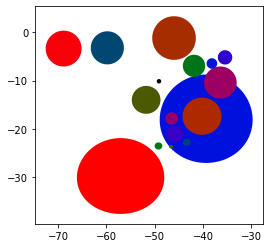

In [5]:
from matplotlib.colors import LinearSegmentedColormap
colormap = []
colors = ["#f7fbff", "#deebf7", "#c6dbef", "#9ecae1", "#6baed6", "#4292c6", "#2171b5", "#084594", "#ffffff"]
colormap = LinearSegmentedColormap.from_list([0,1,2,3,4,5,6,7,8],colors)
gdf.plot(cmap = colormap)